In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [32]:
# Import the data and parse dates
df = pd.read_csv('fcc-forum-pageviews.csv',
                index_col='date',
                parse_dates=True)
df.tail()

,value
date,
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918
2019-12-02,220144
2019-12-03,158549


In [33]:
# Clean the data by filtering out top and bottom 2.5% of the dataset
df = df[ df["value"].between( df["value"].quantile(.025), df["value"].quantile(.975) ) ]

In [34]:
# Create a line plot to visualise page views
def draw_line_plot():
    # Draw line plot
    x = df.index
    y = df['value']
    plt.figure(figsize=(15,7))
    plt.plot(x, y, 'r')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.show()
    # Save image 
    plt.savefig('line_plot.png')
    #return fig

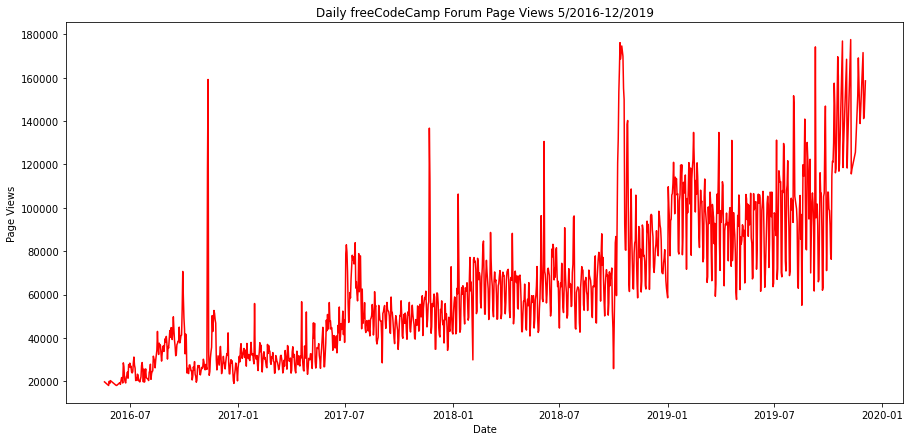

<Figure size 432x288 with 0 Axes>

In [35]:
draw_line_plot()

In [36]:
# Create a month variable
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [37]:
# Draw bar plot to show average daily page views for each month, grouped by year
def draw_bar_plot():
    df_bar = df.copy()
    df_bar["year"] = df.index.year.values
    df_bar["month"] = df.index.month_name()
    
    # Draw bar plot
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack() 
    df_bar.plot.bar(figsize=(15, 10))
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    
    # Save image 
    plt.savefig('bar_plot.png')
    #return fig

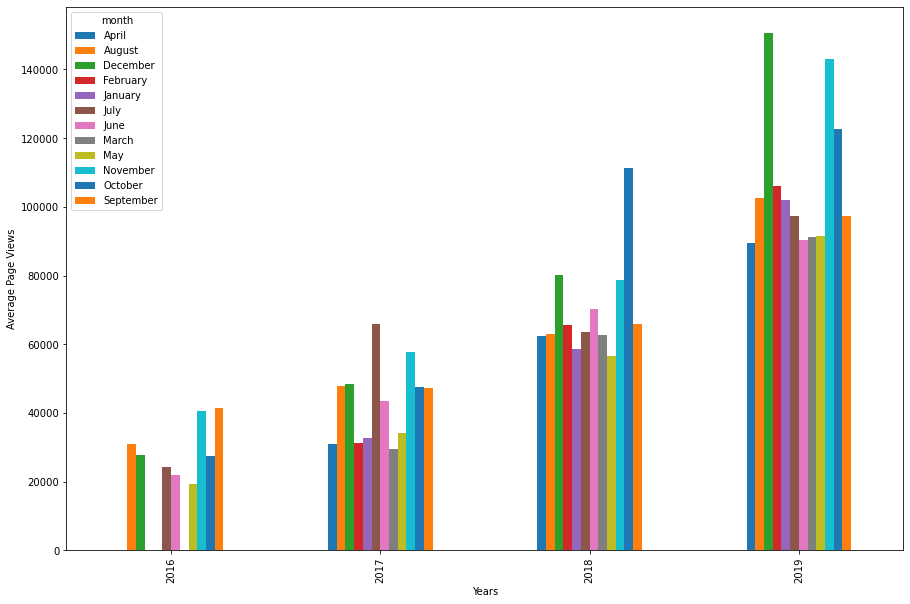

In [38]:
draw_bar_plot()

In [39]:
#Create box plot using seaborn to visualise distributions yearly and monthly 
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    df_box['monthnumber'] = df.index.month
    df_box = df_box.sort_values('monthnumber')

    fig, ax = plt.subplots(1,2,figsize=(15,10))
    sns.boxplot(y = "value", x = "year", data = df_box, ax = ax[0] ) 
    ax[0].set(xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)")
    sns.boxplot(y = "value", x = "month", data = df_box, ax = ax[1])
    ax[1].set(xlabel="Month", ylabel="Page Views", title="Month-wise Box Plot (Seasonality)")

    # Save image 
    plt.savefig('box_plot.png')
    #return fig

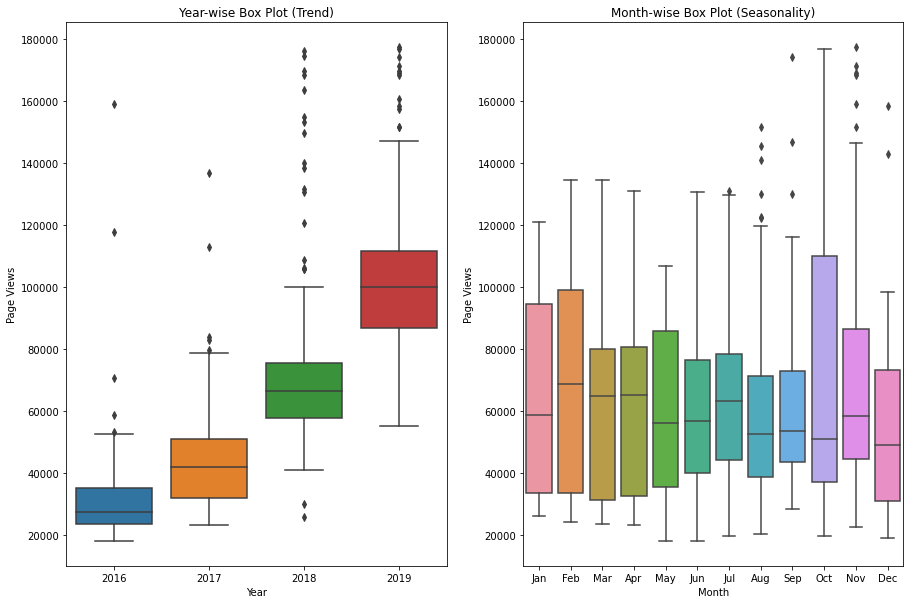

In [40]:
draw_box_plot()